# 第5章　使用`pandas`进行数据预处理

## 任务5.2　清洗数据

<br /><center><b>代码5-9　利用<code>list</code>去重</b></center>

In [1]:
import pandas
detail = pandas.read_csv('data/detail.csv', index_col=0, encoding='gbk')
# 定义去重函数
def delRepeats(array_1):
    array_2 = []
    for i in array_1:
        if i not in array_2:
            array_2.append(i)
    return array_2
# 去重
dishes = list(detail['dishes_name'])
print('去重前菜品总数为：', len(dishes))
dish = delRepeats(dishes)
print('函数去重后菜品总数为：', len(dish))

去重前菜品总数为： 10037
函数去重后菜品总数为： 145


<br /><center><b>代码5-10　利用<code>set</code>的特性去重</b></center>

In [2]:
print('去重前菜品总数为：', len(dishes))
dish_set = set(dishes)
print('集合去重后菜品总数为：', len(dish_set))

去重前菜品总数为： 10037
集合去重后菜品总数为： 145


<br /><center><b>代码5-11　使用<code>drop_duplicates</code>方法对菜品名称去重</b></center>

In [3]:
dishes_name = detail['dishes_name'].drop_duplicates()
print('方法去重后菜品总数为：', len(dishes_name))

方法去重后菜品总数为： 145


<br /><center><b>代码5-12　使用<code>drop_duplicates</code>方法对多列去重</b></center>

In [4]:
print('去重前订单详情表的形状为：', detail.shape)
shapeData = detail.drop_duplicates(subset=['order_id', 'emp_id']).shape
print('依照订单编号、会员编号去重之后订单详情表大小为：', shapeData)

去重前订单详情表的形状为： (10037, 18)
依照订单编号、会员编号去重之后订单详情表大小为： (942, 18)


<br />
<center>
    <b>代码5-13　求出<code>counts</code>和<code>amounts</code>两列数据的<code>kendall</code>法相似度矩阵</b>
</center>

In [5]:
corrData = detail[['counts', 'amounts']].corr(method='kendall')
print('销量和售价的Kendall法相似度矩阵为：', corrData, sep='\n')

销量和售价的Kendall法相似度矩阵为：
           counts   amounts
counts   1.000000 -0.229968
amounts -0.229968  1.000000


<br />
<center>
    <b>
        代码5-14　求出
        <code>dishes_name</code>
        、
        <code>counts</code>
        和
        <code>amounts</code>
        这3个特征的
        <code>pearson</code>
        法相似度矩阵
    </b>
</center>

In [6]:
corrData_1 = detail[['dishes_name', 'counts', 'amounts']].corr(method='pearson')
print('菜品名称、销量和售价的Pearson法相似度矩阵为：', corrData_1, sep='\n')

菜品名称、销量和售价的Pearson法相似度矩阵为：
           counts   amounts
counts   1.000000 -0.159264
amounts -0.159264  1.000000


<br /><center><b>代码5-15　使用<code>DataFrame.equals</code>方法去重</b></center>

In [7]:
# 定义判定函数
def featureEquals(frame):
    frameEquals = pandas.DataFrame([], columns=frame.columns, index=frame.columns)
    for i in frame.columns:
        for j in frame.columns:
            frameEquals.loc[i, j] = frame.loc[:, i].equals(frame.loc[:, j])
    return frameEquals
# 调用函数
dataEquals = featureEquals(detail)
print('detail的特征相等矩阵的前5行5列为：', dataEquals.iloc[:5, :5], sep='\n')

detail的特征相等矩阵的前5行5列为：
                   order_id  dishes_id  logicprn_name  parent_class_name  \
order_id               True      False          False              False   
dishes_id             False       True          False              False   
logicprn_name         False      False           True               True   
parent_class_name     False      False           True               True   
dishes_name           False      False          False              False   

                   dishes_name  
order_id                 False  
dishes_id                False  
logicprn_name            False  
parent_class_name        False  
dishes_name               True  


<br />
<center>
    <b>代码5-16　通过遍历的方式进行数据筛选</b>
</center>

In [8]:
# 遍历数据
dataLength = dataEquals.shape[0]
duplicateColumn = []
for k in range(dataLength):
    for l in range(k + 1, dataLength):
        if dataEquals.iloc[k, l] & (dataEquals.columns[l] not in duplicateColumn):
            duplicateColumn.append(dataEquals.columns[l])
# 进行去重
print('需要删除的列为：', duplicateColumn)
detail.drop(duplicateColumn, axis=1, inplace=True)
print('删除多余列后detail的特征数目为：', detail.shape[1])

需要删除的列为： ['parent_class_name', 'cost', 'discount_amt', 'discount_reason', 'kick_back', 'add_info', 'bar_code', 'add_inprice']
删除多余列后detail的特征数目为： 10


<br />
<center>
    <b>代码5-17　<code>isnull</code>和<code>notnull</code>用法</b>
</center>

In [9]:
print('detail每个特征缺失的数目为：', detail.isnull().sum(), sep='\n')
print('detail每个特征存在的数目为：', detail.notnull().sum(), sep='\n')

detail每个特征缺失的数目为：
order_id                0
dishes_id               0
logicprn_name       10037
dishes_name             0
itemis_add              0
counts                  0
amounts                 0
place_order_time        0
picture_file            0
emp_id                  0
dtype: int64
detail每个特征存在的数目为：
order_id            10037
dishes_id           10037
logicprn_name           0
dishes_name         10037
itemis_add          10037
counts              10037
amounts             10037
place_order_time    10037
picture_file        10037
emp_id              10037
dtype: int64


<br />
<center>
    <b>代码5-18　使用<code>dropna</code>方法删除缺失值</b>
</center>

In [10]:
print('去除缺失的列前detail的形状为：', detail.shape)
print('去除缺失的列后detail的形状为：', detail.dropna(axis=1, how='any').shape)

去除缺失的列前detail的形状为： (10037, 10)
去除缺失的列后detail的形状为： (10037, 9)


<br>
<center>
    <b>代码5-19　使用<code>fillna</code>方法替换缺失值</b>
</center>

In [11]:
detail = detail.fillna(-99)
print('detail每个特征缺失的数目为：', detail.isnull().sum(), sep='\n')

detail每个特征缺失的数目为：
order_id            0
dishes_id           0
logicprn_name       0
dishes_name         0
itemis_add          0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
dtype: int64


<br>
<center>
    <b>代码5-20　<code>SciPy interpolate</code>模块插值</b>
</center>

In [12]:
# 线性插值
import numpy
from scipy.interpolate import interp1d
x = numpy.array([1, 2, 3, 4, 5, 8, 9, 10])
y_1 = numpy.array([2, 8, 18, 32, 50, 128, 162, 200])
y_2 = numpy.array([3, 5, 7, 9, 11, 17, 19, 21])
linearInsertValue_1 = interp1d(x, y_1, kind='linear')
linearInsertValue_2 = interp1d(x, y_2, kind='linear')
print('当x为6、7时，使用线性插值y_1为：', linearInsertValue_1([6, 7]))
print('当x为6、7时，使用线性插值y_2为：', linearInsertValue_2([6, 7]))

当x为6、7时，使用线性插值y_1为： [ 76. 102.]
当x为6、7时，使用线性插值y_2为： [13. 15.]


In [13]:
# 拉格朗日插值
from scipy.interpolate import lagrange
lagrangeInsertValue_1 = lagrange(x, y_1)
lagrangeInsertValue_2 = lagrange(x, y_2)
print('当x为6、7时，使用拉格朗日插值y_1为：', lagrangeInsertValue_1([6, 7]))
print('当x为6、7时，使用拉格朗日插值y_2为：', lagrangeInsertValue_2([6, 7]))

当x为6、7时，使用拉格朗日插值y_1为： [72. 98.]
当x为6、7时，使用拉格朗日插值y_2为： [13. 15.]


In [14]:
# 三次样条插值
from scipy.interpolate import splrep, splev
tck_1 = splrep(x, y_1)
tck_2 = splrep(x, y_2)
xnew = numpy.array([6, 7])
ynew_1 = splev(xnew, tck_1, der=0)
ynew_2 = splev(xnew, tck_2, der=0)
print('当x为6、7时，使用样条插值y_1为：', ynew_1)
print('当x为6、7时，使用样条插值y_2为：', ynew_2)

当x为6、7时，使用样条插值y_1为： [72. 98.]
当x为6、7时，使用样条插值y_2为： [13. 15.]


<br>
<center>
    <b>代码5-21　使用$3\sigma$原则识别异常值</b>
</center>

In [15]:
# 定义原则
def outRange(series):
    boolean = (
        series.mean() - 3 * series.std() > series
    ) | (
        series.mean() + 3 * series.std() < series
    )
    index = numpy.arange(series.shape[0])[boolean]
    outrange = series.iloc[index]
    return outrange
outlier = outRange(detail['counts'])
print('使用拉依达准则判定异常值个数为：', outlier.shape[0])
print('异常值的最大值为：', outlier.max())
print('异常值的最小值为；', outlier.min())

使用拉依达准则判定异常值个数为： 209
异常值的最大值为： 10
异常值的最小值为； 3


<br>
<center>
    <b>代码5-22　菜品售价根据箱线图识别异常值</b>
</center>

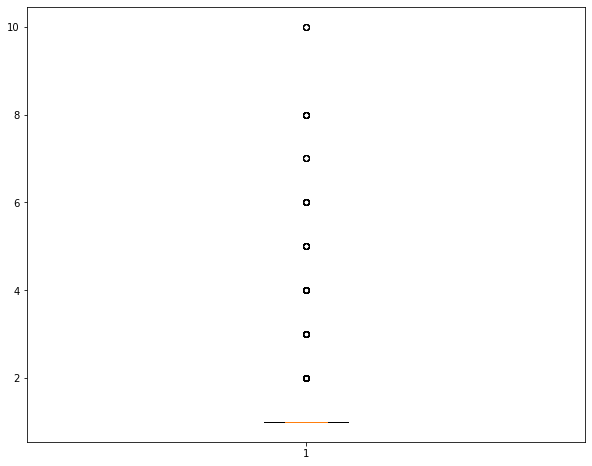

销售量数据异常值个数为： 516
销售量数据异常值的最大值为： 10
销售量数据异常值的最小值为： 2


In [16]:
%matplotlib inline
from matplotlib import pyplot
pyplot.figure(figsize=(10, 8))
p = pyplot.boxplot(detail['counts'].values, notch=True)
outlier_1 = p['fliers'][0].get_ydata()
pyplot.savefig('img/菜品异常数据识别.svg')
pyplot.show()
print('销售量数据异常值个数为：', len(outlier_1))
print('销售量数据异常值的最大值为：', max(outlier_1))
print('销售量数据异常值的最小值为：', min(outlier_1))

<br>
<center>
    <b>代码5-23　订单详情表的样本去重与特征去重</b>
</center>

In [17]:
import pandas
detail = pandas.read_csv('data/detail.csv', index_col=0, encoding='gbk')
print('进行去重操作前订单详情表的形状为：', detail.shape)
# 样本去重
detail.drop_duplicates(inplace=True)
# 特征去重
def featureEquals(frame):
    frameEquals = pandas.DataFrame([], columns=frame.columns, index=frame.columns)
    for i in frame.columns:
        for j in frame.columns:
            frameEquals.loc[i, j] = frame.loc[:, i].equals(frame.loc[:, j])
    return frameEquals
deletedEquals = featureEquals(detail)
frameLength = deletedEquals.shape[0]
duplicateColumn = []
for k in range(frameLength):
    for l in range(k + 1, frameLength):
        if deletedEquals.iloc[k, l] & (deletedEquals.columns[l] not in duplicateColumn):
            duplicateColumn.append(deletedEquals.columns[l])
# 删除重复列
detail.drop(duplicateColumn, axis=1, inplace=True)
print('进行去重操作后订单详情表的形状为：', detail.shape)

进行去重操作前订单详情表的形状为： (10037, 18)
进行去重操作后订单详情表的形状为： (10037, 10)


<br>
<center>
    <b>代码5-24　订单详情表的缺失值检测与处理</b>
</center>

In [18]:
# 统计缺失率
nanRate = (detail.isnull().sum() / detail.shape[0] * 100).astype('str') + '%'
print('detail每个特征缺失率为：', nanRate, sep='\n')
# 删除空列
detail.dropna(axis=1, how='all', inplace=True)
print('经过缺失值处理后订单详情表各特征缺失值的数目为：', detail.isnull().sum(), sep='\n')

detail每个特征缺失率为：
order_id              0.0%
dishes_id             0.0%
logicprn_name       100.0%
dishes_name           0.0%
itemis_add            0.0%
counts                0.0%
amounts               0.0%
place_order_time      0.0%
picture_file          0.0%
emp_id                0.0%
dtype: object
经过缺失值处理后订单详情表各特征缺失值的数目为：
order_id            0
dishes_id           0
dishes_name         0
itemis_add          0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
dtype: int64


<br>
<center>
    <b>代码5-25　订单详情表异常值检测与处理</b>
</center>

In [19]:
%xmode minimal
# 定义处理函数
def outRange(series):
    QL = series.quantile(0.25)
    QU = series.quantile(0.75)
    IQR = QU - QL
    series.loc[series > (QU + 1.5 * IQR)] = QU
    series.loc[series < (QL - 1.5 * IQR)] = QL
    return series
# 处理异常值
detail['counts'] = outRange(detail['counts'])
detail['amounts'] = outRange(detail['amounts'])
print('销售量最小值为：', detail['counts'].min())
print('销售量最大值为：', detail['counts'].max())
print('售价最小值为：', detail['amounts'].min())
print('售价最大值为：', detail['amounts'].max())

Exception reporting mode: Minimal
销售量最小值为： 1.0
销售量最大值为： 1.0
售价最小值为： 1.0
售价最大值为： 99.0


C:\Users\legen\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
